In [518]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [519]:
plt.style.use('dark_background')

In [520]:
def get_diff_matrix(data_prev, data_next, weights = 1):
    a = np.stack([data_prev]*len(data_next), 0)
    b = np.stack([data_next]*len(data_prev), 0)
    axies = [i for i in range(len(b.shape))]
    axies[0], axies[1] = axies[1], axies[0]
    b = np.transpose(b, axies)
    return (a - b)*weights

def add_axi(a):
    return np.reshape(a, [*a.shape, 1])

In [521]:
activity = pd.read_csv('./a.csv', index_col=0).to_numpy()

In [522]:
activity.shape

(500, 40)

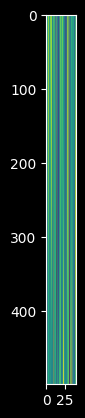

In [523]:
plt.imshow(activity)
plt.show()

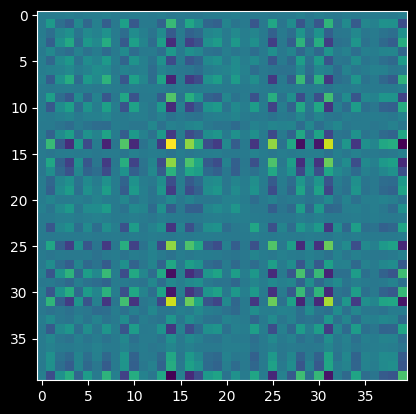

In [524]:
dot_products = activity.T @ activity
dot_products = dot_products
plt.imshow(dot_products)
plt.show()

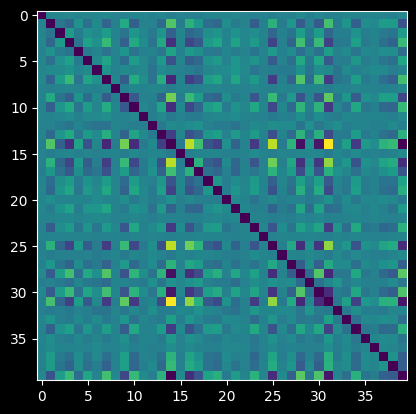

In [525]:
dot_products = 1 / dot_products
dot_products = dot_products - dot_products.min()
dot_products /= dot_products.max()
dot_products *= (1 - np.eye(dot_products.shape[0]))
plt.imshow(dot_products)
plt.show()

In [526]:
def embd(low_dim, distances, dt = 0.001, epochs = 100, precision = 0.000001):
    N = distances.shape[1]
    distances = add_axi(distances)
    x = np.random.uniform(-1, 1, (N, low_dim))
    last_one = 100001
    for e in range(epochs):
        vectors = get_diff_matrix(x, x)
        lenghts = add_axi((vectors**2).sum(-1)**0.5) + 0.0001
        #lenghts = distances - add_axi((vectors**2).sum(-1)**0.5)
        x += (distances*vectors/lenghts - vectors).sum(0)*dt
        loss = loss = (lenghts**2).mean()
        if e % 10 == 0:
            print(f"{e}_energy: ",loss)
        if e != 0 and abs(last_one - loss) < precision:
            print("changes in energy less than precision => stopping")
            break
        last_one = loss
    print(f"final_{e}_energy: ",loss)

    return x

In [527]:
q = embd(50, dot_products, epochs = 10000, precision=0)
plt.imshow(q)
plt.show()

0_energy:  31.448722434001848
10_energy:  14.931858153063791
20_energy:  7.316476698583078
30_energy:  3.7411186536759344
40_energy:  2.021633712056394
50_energy:  1.169105075639307
60_energy:  0.730794309214913
70_energy:  0.4961951042740091
80_energy:  0.36535164816924476
90_energy:  0.2894872655140986
100_energy:  0.2439860127650104
110_energy:  0.21593470552642796
120_energy:  0.1982736653569175
130_energy:  0.18698341784903444
140_energy:  0.17968960307939225
150_energy:  0.1749454671097581
160_energy:  0.1718475901201242
170_energy:  0.1698213641660115
180_energy:  0.16849645085480666
190_energy:  0.16763196222451612
200_energy:  0.16707024283625915
210_energy:  0.16670770076481248
220_energy:  0.16647610581224057
230_energy:  0.16633046377915367
240_energy:  0.16624109346882643
250_energy:  0.16618842276919274
260_energy:  0.16615955899714085
270_energy:  0.16614602373089504
280_energy:  0.16614225487982062
290_energy:  0.16614461552483967
300_energy:  0.16615073800852487
310_en

KeyboardInterrupt: 

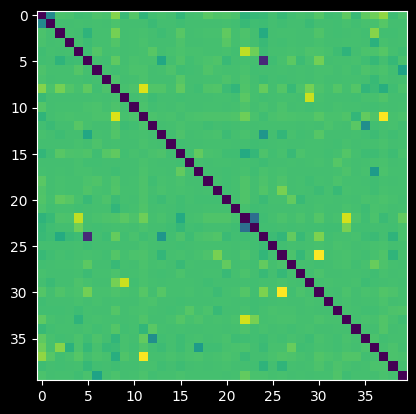

0.3421010784667306


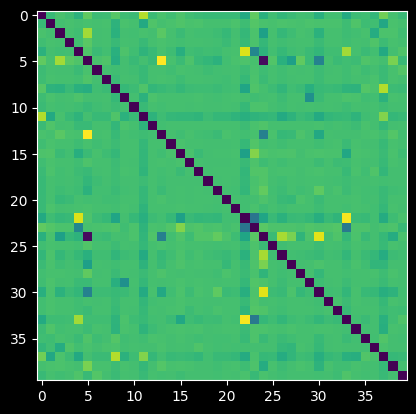

In [ ]:
g = get_diff_matrix(q, q)
plt.imshow((g**2).sum(-1)**0.5)
plt.show()
t = np.abs((g**2).sum(-1) - dot_products)
print(t.max())
plt.imshow(t)
plt.show()